# 🎯 K-Means Clustering

## 🔍 What is K-Means?
**Unsupervised learning algorithm** that partitions data into `k` clusters by minimizing within-cluster sum of squares (WCSS).

---

## ⚙️ Algorithm Steps

```python
# K-Means Algorithm
1. Choose number of clusters (k)
2. Initialize k centroids randomly
3. Repeat until convergence:
   a. Assign each point to nearest centroid
   b. Update centroids to cluster mean
   c. Check for convergence
```

### Mathematical Formula
**Objective Function (minimize):**

$J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$

Where:
- $\mu_i$ = centroid of cluster $i$
- $C_i$ = set of points in cluster $i$  
- $||x - \mu_i||^2$ = squared Euclidean distance

**Centroid Update:**
$\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$

---

## 🛠️ Implementation

```python
from sklearn.cluster import KMeans
import numpy as np

# Basic usage
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Key parameters
KMeans(
    n_clusters=3,           # Number of clusters
    init='k-means++',       # Smart initialization
    n_init=10,              # Number of random starts
    max_iter=300,           # Max iterations
    random_state=42         # Reproducibility
)
```

---

## 📊 Choosing Optimal K

### 1. Elbow Method
```python
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot WCSS vs K, look for "elbow"
```

### 2. Silhouette Score
```python
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
# Higher score = better clustering
```

---

## ✅ Advantages

- **Simple & Fast** → Easy to implement and understand
- **Scalable** → Works well with large datasets
- **Guaranteed Convergence** → Always finds a solution
- **Memory Efficient** → Low memory requirements

---

## ❌ Disadvantages

- **Need to specify K** → Requires domain knowledge
- **Sensitive to initialization** → Can get stuck in local minima
- **Assumes spherical clusters** → Struggles with non-spherical shapes
- **Sensitive to outliers** → Outliers can skew centroids
- **Sensitive to scale** → Need feature scaling

---

## 🎯 Key Assumptions

1. **Spherical clusters** → Clusters are roughly circular
2. **Similar sizes** → Clusters have similar number of points
3. **Similar densities** → Clusters have similar variance
4. **Well-separated** → Clear gaps between clusters

---

## 🔧 Best Practices

```python
# 1. Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Use k-means++ initialization
kmeans = KMeans(init='k-means++')

# 3. Run multiple times
kmeans = KMeans(n_init=10)

# 4. Evaluate clustering quality
from sklearn.metrics import silhouette_score, calinski_harabasz_score
```

---

## 🎤 Interview Answer

**"K-Means is an unsupervised clustering algorithm that partitions data into k clusters by minimizing within-cluster sum of squares.**

**Process:** Start with k random centroids, assign points to nearest centroid, update centroids to cluster means, repeat until convergence.

**Key challenges:** Choosing optimal k (use elbow method or silhouette score), sensitive to initialization and outliers, assumes spherical clusters.

**Best practices:** Scale features, use k-means++ initialization, run multiple times, and evaluate with silhouette score."

---

## 🔄 Variations

- **K-Means++**: Smart centroid initialization
- **Mini-batch K-Means**: Faster for large datasets
- **Fuzzy C-Means**: Soft clustering (points can belong to multiple clusters)

---

## 🚨 Common Pitfalls

- Forgetting to scale features
- Not trying multiple initializations
- Using K-Means on non-spherical data
- Not handling outliers
- Choosing K arbitrarily

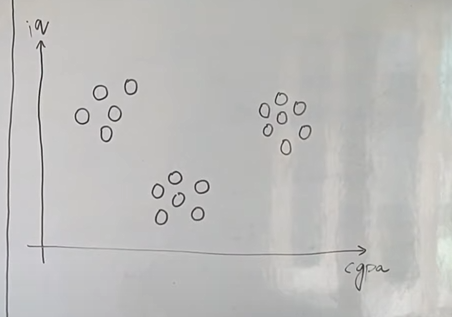

data

![Screenshot 2025-06-13 115611.png](<attachment:Screenshot 2025-06-13 115611.png>)
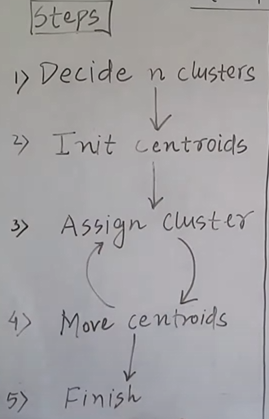
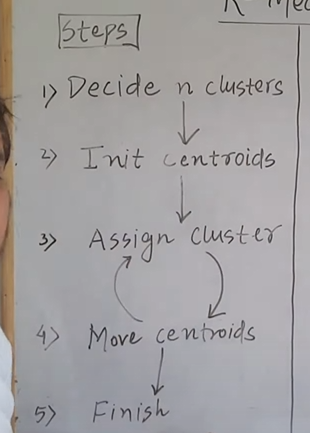

First, decide the no of clusters

Next, the algorithm chooses k points to be the centroid randomly

Assigning clusters - find the distance from each centroid and assign the cluster based on the centroid it is closest to

Now, calculate the centroid for each cluster. The centroid is the mean of x points and y points

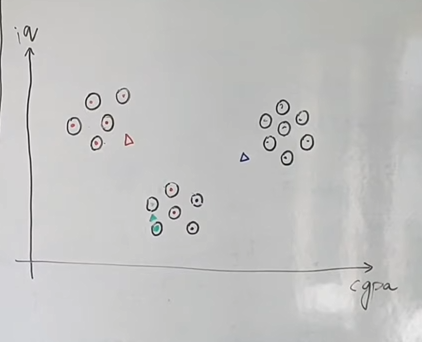

The triangles are the centroids

Now, if the centroids have changed, then recalculate the distances and assign the clusters again

After reassigning the clusters, recalculate the centroids

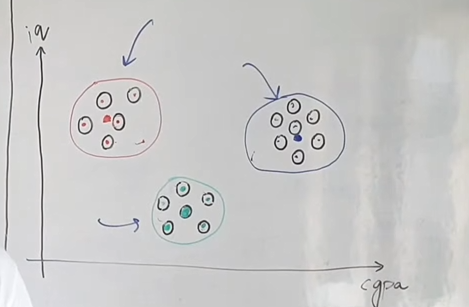

In the final step, the centroids don't move as the clusters didn't change at all due to good clusters being formed already

### 📘 Elbow Curve & WCSS in K-Means Clustering

---

## 🧠 What is the Elbow Curve?

The **Elbow Curve** is used to determine the **optimal number of clusters (K)** in K-Means Clustering.

**Steps:**
1. Run K-Means clustering for a range of K values (e.g., 1 to 10).
2. Calculate **WCSS** for each K.
3. Plot K vs WCSS.
4. Identify the "elbow point" — where the WCSS drop slows down significantly.

The **elbow** suggests the ideal trade-off between model simplicity and compact clusters.

---

## 📉 What is WCSS?

**WCSS = Within-Cluster Sum of Squares**

It measures how close the data points in a cluster are to their centroid.

$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

- $k$: number of clusters  
- $C_i$: cluster $i$  
- $\mu_i$: centroid of cluster $i$  
- $x$: data point  


**Lower WCSS = tighter, more compact clusters**

---

## 📊 Example Elbow Curve

Suppose the WCSS values for K = 1 to 6 are:

| K | WCSS |
|---|------|
| 1 | 1000 |
| 2 | 600  |
| 3 | 400  |
| 4 | 300  |
| 5 | 250  |
| 6 | 220  |

Plotting WCSS vs K might look like this:



### Example Elbow curve

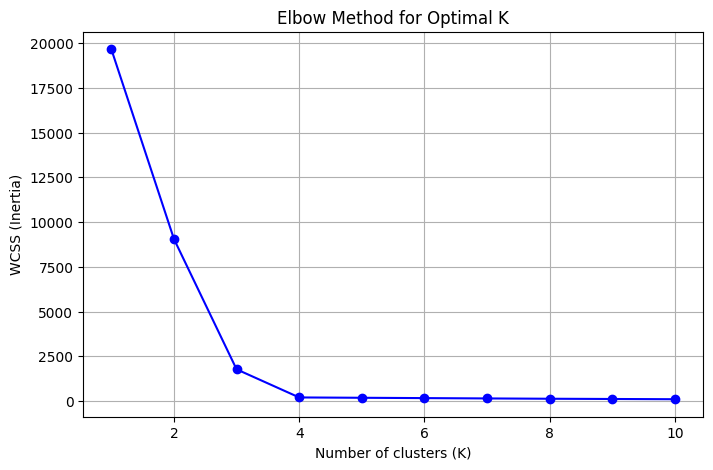

In [1]:
# Elbow Curve Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# List to store WCSS values for each k
wcss = []

# Try different values of k (number of clusters)
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


To find the elbow point, it is the point where wcss starts to plateau and slows down